In [233]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import os
pd.set_option('display.max_colwidth', -1)    # stop the column text truncating... 
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Load in the Datasets

In [234]:
admissions_df = pd.read_csv('../data_output/hospital_admissions_resp_crdv/admissions_resp_crdv_inc_strk.csv')
prevalence_df = pd.read_csv('../data_output/nhs_qof_dataset/nhs_qof_dataset_ccg.csv')
admissions_df = admissions_df.rename(columns={'Time period Sortable':'Year'})
prevalence_df = prevalence_df.rename(columns={'Time period Sortable':'Year'})


In [235]:
# fix the year column
admissions_df['Year'] =  pd.to_datetime(
    (admissions_df['Year']), 
    format='%Y').dt.year

### 2. Rename Indicators 

In [236]:
admissions_df.head(2)
admissions_df.dtypes

Unnamed: 0                                  int64  
Unnamed: 0.1                                int64  
Indicator ID                                int64  
Indicator Name                              object 
Parent Code                                 object 
Parent Name                                 object 
Area Code                                   object 
Area Name                                   object 
Area Type                                   object 
Sex                                         object 
Age                                         object 
Category Type                               float64
Category                                    float64
Time period                                 object 
Value                                       float64
Lower CI 95.0 limit                         float64
Upper CI 95.0 limit                         float64
Lower CI 99.8 limit                         float64
Upper CI 99.8 limit                         float64
Count       

In [237]:
indicator_dict = {
       'Emergency hospital admissions for COPD, all ages': 'COPD Admissions',
       'Emergency hospital admissions for respiratory disease': 'Respiratory Admissions',
       'Admissions for lower respiratory tract infections in infants aged 1 year': 'Respiratory Tract Admissions 1yr',
       'Admissions for lower respiratory tract infections in infants aged under 1 year': 'Respiratory Tract Admissions U1yr',
       'Emergency hospital admissions for asthma in adults (aged 19 years and over)': 'Asthma Admissions Over 19yr',
       'Hospital admissions for asthma (under 19 years)':'Asthma Admissions Under 19yr',
       'Emergency hospital admissions for pneumonia': 'Pneumonia Admissions',
       'CHD admissions (all ages)': 'CHD Admissions', 
       'Heart failure admissions (all ages)': 'Heart Failure Admissions',
       'Stroke admissions (Sentinel Stroke National Audit Programme)': 'Stroke Admissions',
       'Stroke admissions with history of atrial fibrillation not prescribed anticoagulation prior to stroke': 'Stroke Atrial Fib Admissions'   
}

respiratory = [
    'COPD Admissions',
    'Respiratory Admissions',
    'Respiratory Tract Admissions 1yr',
    'Respiratory Tract Admissions U1yr',
    'Asthma Admissions Over 19yr',
    'Asthma Admissions Under 19yr',
    'Pneumonia Admissions',
]
cardiov_ = [
    'CHD Admissions',
    'Heart Failure Admissions',
    'Stroke Admissions',
    'Stroke Atrial Fib Admissions' 
]

admissions_df['Indicator Name'] = admissions_df['Indicator Name'].map(indicator_dict)
admissions_df['Indicator Name'].unique()

array(['COPD Admissions', 'Respiratory Admissions',
       'Respiratory Tract Admissions 1yr',
       'Respiratory Tract Admissions U1yr', 'Asthma Admissions Over 19yr',
       'Asthma Admissions Under 19yr', 'Pneumonia Admissions',
       'CHD Admissions', 'Heart Failure Admissions', 'Stroke Admissions',
       'Stroke Atrial Fib Admissions'], dtype=object)

In [238]:
indicator_dict_q = {
       'Hypertension: QOF prevalence (all ages)': 'Hypertension Prevalence',
       'Diabetes: QOF prevalence (17+)': 'Diabetes Prevalence', 
       'CHD: QOF prevalence (all ages)': 'CHD Prevalence',
       'Heart Failure: QOF prevalence (all ages)': 'Heart Failure Prevalence' ,
       'CKD: QOF prevalence (18+)': 'CKD Prevalence', 
       'Stroke: QOF prevalence (all ages)': 'Stroke: Prevalence',
       'Atrial fibrillation: QOF prevalence': 'Atrial Fibrillation Prevalence',
       'COPD: QOF prevalence (all ages)': 'COPD Prevalence',
       'Asthma: QOF prevalence (all ages)': 'Asthma Prevalence'
}

resp_p = [
    'COPD Prevalence',
    'Asthma Prevalence'  
]

cardio_p = [
    'Hypertension Prevalence',
    'Diabetes Prevalence', 
    'CHD Prevalence',
    'Heart Failure Prevalence',
    'CKD Prevalence', 
    'Stroke: Prevalence',
    'Atrial Fibrillation Prevalence',
]

prevalence_df['Indicator Name'] = prevalence_df['Indicator Name'].map(indicator_dict_q)
prevalence_df['Indicator Name'].unique()

array(['Hypertension Prevalence', 'Diabetes Prevalence', 'CHD Prevalence',
       'Heart Failure Prevalence', 'CKD Prevalence', 'Stroke: Prevalence',
       'Atrial Fibrillation Prevalence', 'COPD Prevalence',
       'Asthma Prevalence'], dtype=object)

### 3. Plots for Hospital Admissions

3.1 - Visualise the distribution of emissions by Sex

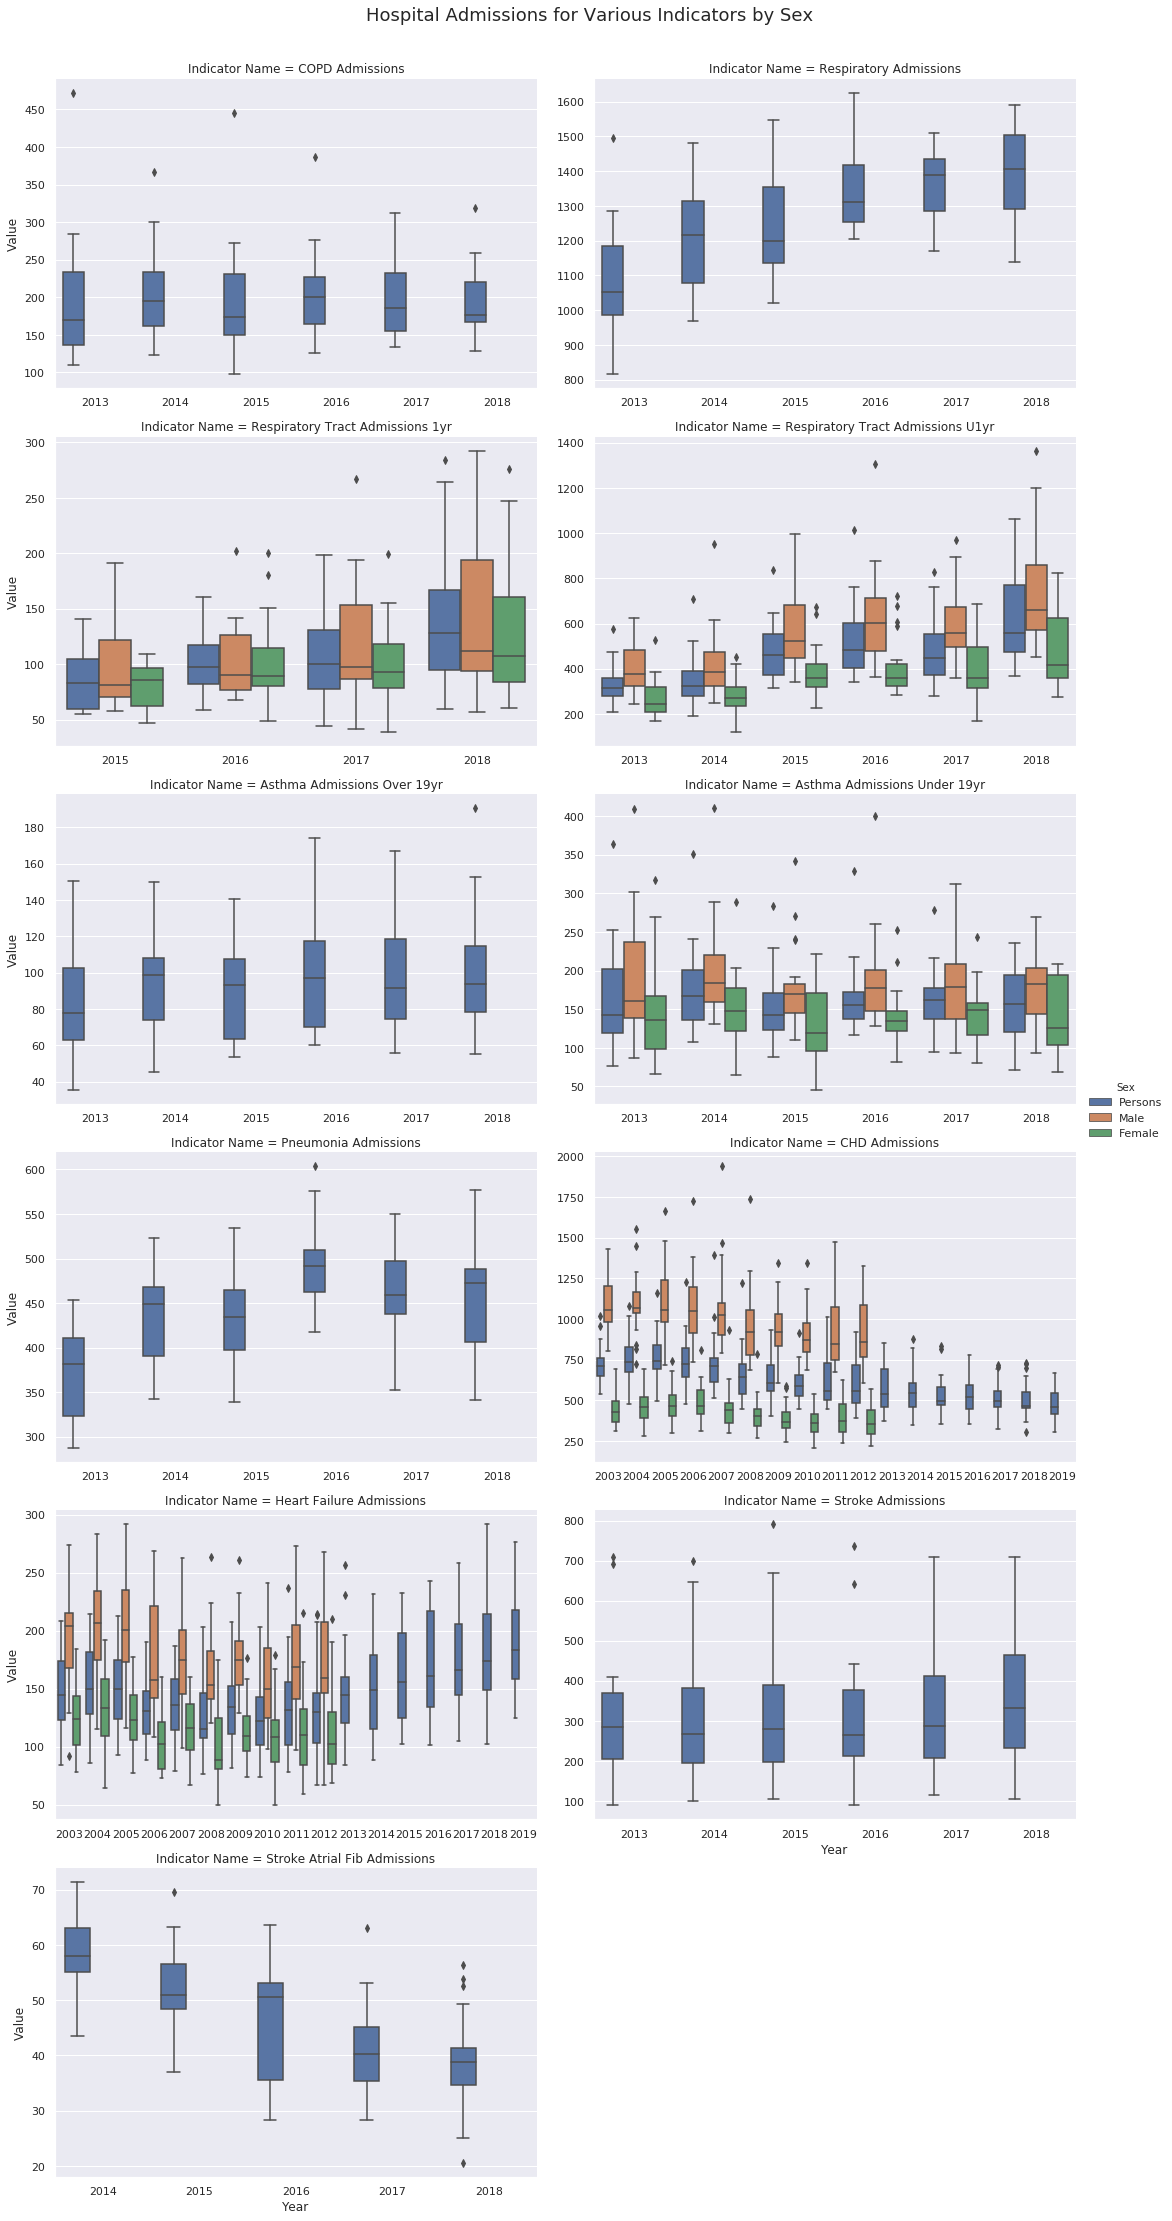

In [239]:
# Try boxplots by sex for both indicators... 

sns.set_style("darkgrid")
# as facet grid does not work with hue and boxplot, use catplot https://github.com/mwaskom/seaborn/issues/915
g = sns.catplot(
    x="Year", 
    y="Value", 
    col="Indicator Name", 
    kind="box", 
    data=admissions_df, 
    hue='Sex', 
    col_wrap=2, 
    sharey=False, 
    sharex=False, 
    aspect=1.5,
   )

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle('Hospital Admissions for Various Indicators by Sex', y = 1.02, size=18)

plt.show()

Our plots show that we have data for both sexes for 5/11 indicators and across the board males appear to have greater admissions than females. Male/Female breakdowns also cease in 2/5 indicators. 

For consistency between indicators we will progress with the 'Persons' Sex Category.

In [196]:
admissions_df = admissions_df[admissions_df['Sex']=='Persons']

3.2 Use a Boxplots Time Series to visualise the summary statistics of hospital admissions

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


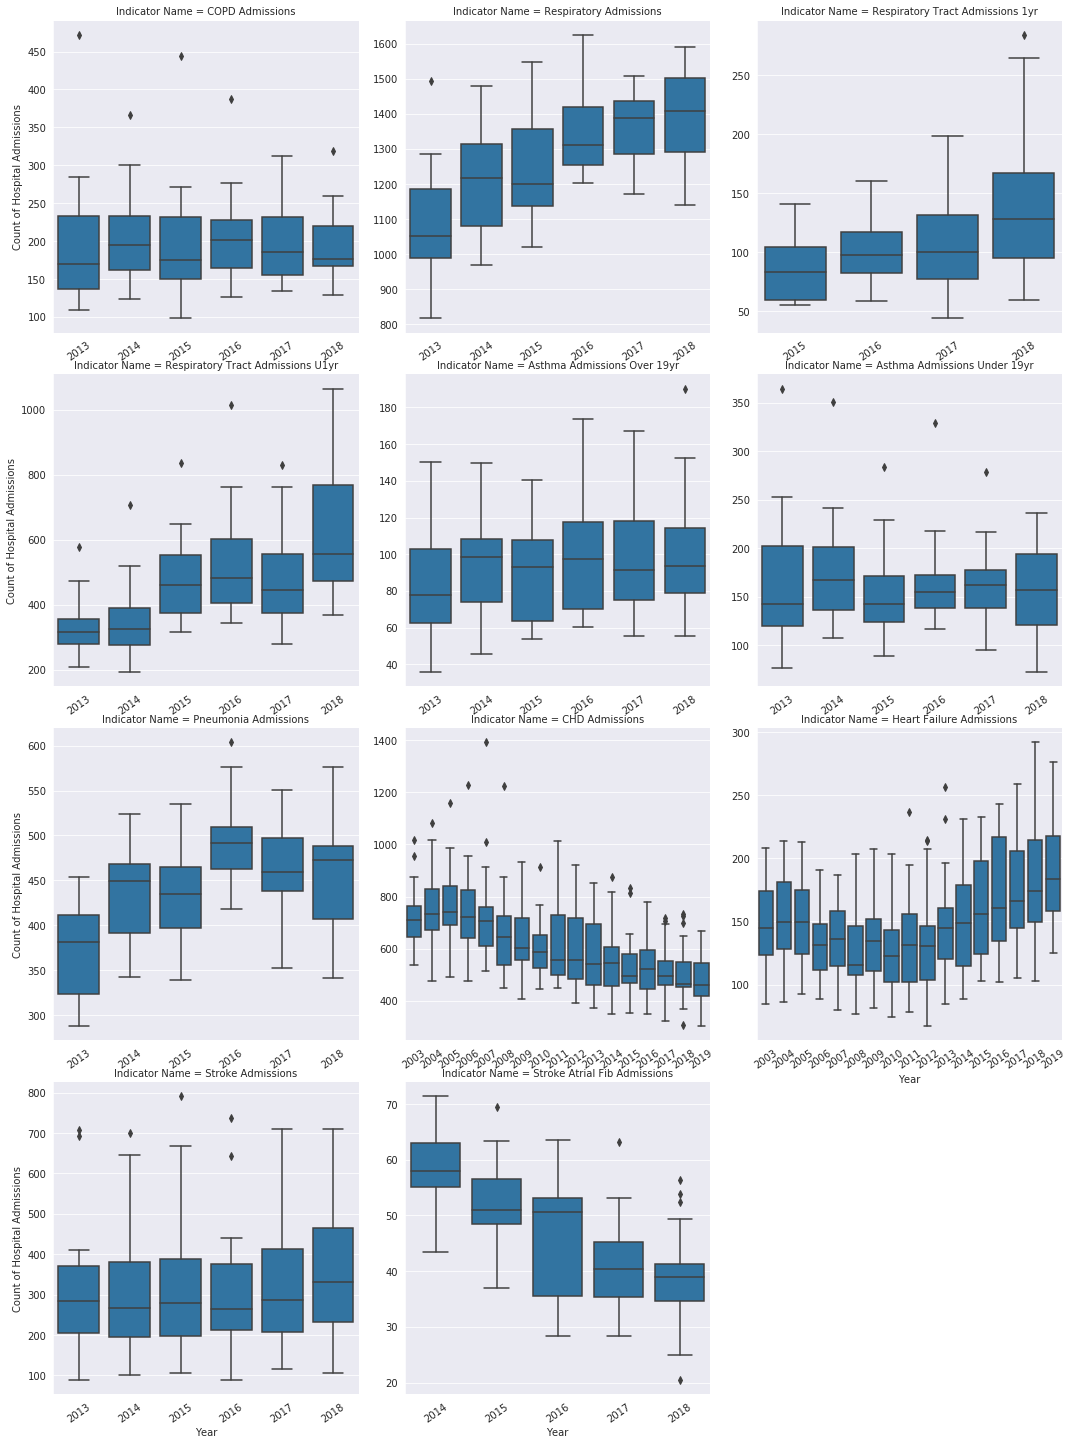

In [197]:
## Create facet grid, specify column order and map boxplots.
s = sns.FacetGrid(
    data=admissions_df, 
    col='Indicator Name', 
    col_wrap=3, 
    height=5,
    sharex=False,
    sharey=False,
)
s.map(sns.boxplot, 'Year', 'Value')

s.set_axis_labels(y_var='Count of Hospital Admissions')


# rotate the x-ticks orientation for a facet grid
for ax in s.axes:
    for label in ax.get_xticklabels():
            label.set_rotation(35)

plt.show()

3.2 Use a Boxplots Time Series to visualise the summary statistics of hospital admissions - breakdown by Radius (Inner/Outer)

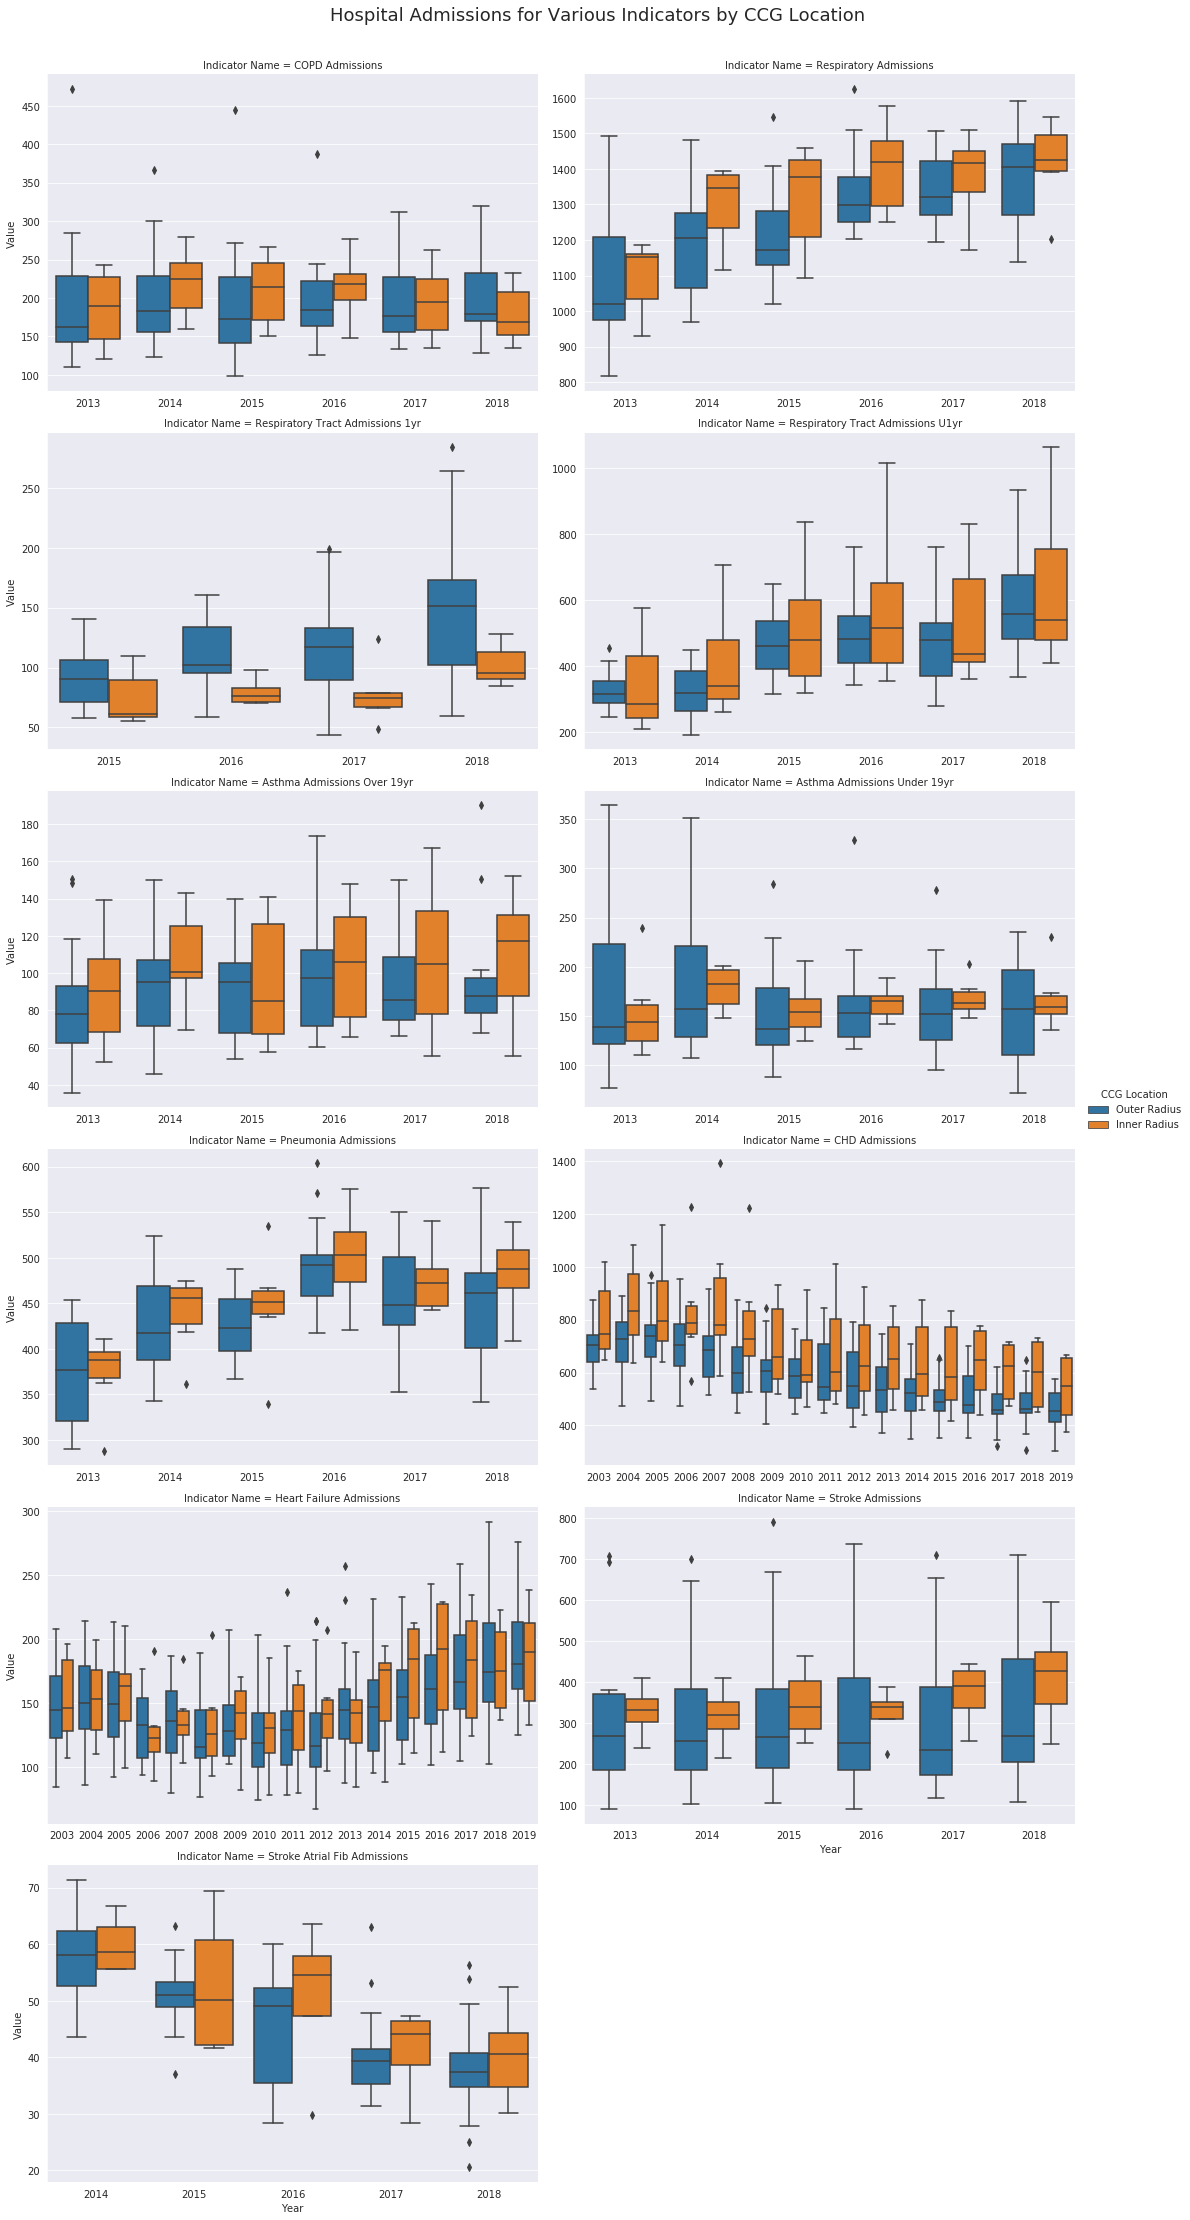

In [198]:
# Try boxplots by sex for both indicators... 

# as facet grid does not work with hue and boxplot, use catplot https://github.com/mwaskom/seaborn/issues/915
g = sns.catplot(
    x="Year", 
    y="Value", 
    col="Indicator Name", 
    kind="box", 
    data=admissions_df, 
    hue='CCG Location', 
    col_wrap=2, 
    sharey=False, 
    sharex=False, 
    aspect=1.5,
   )

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle('Hospital Admissions for Various Indicators by CCG Location', y = 1.02, size=18)

plt.show()

3.3 Plot trends over time with lineplot series

In [199]:
admissions_df.head()

,Unnamed: 0,Unnamed: 0.1,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Year,New data,Compared to goal,CCG Location
0,0,20063,93577,COPD Admissions,E92000001,England,E38000007,NHS Basildon And Brentwood CCG,CCGs (2019/20),Persons,All ages,NaN,NaN,2013/14,233.43,214.3,253.8,203.9,265.9,560.0,263956.0,NaN,NaN,Similar,Not compared,2013,NaN,NaN,Outer Radius
1,1,20073,93577,COPD Admissions,E92000001,England,E38000020,NHS Brent CCG,CCGs (2019/20),Persons,All ages,NaN,NaN,2013/14,169.26,150.9,189.2,141.0,201.2,325.0,349495.0,NaN,NaN,Not compared,Not compared,2013,NaN,NaN,Outer Radius
2,2,20089,93577,COPD Admissions,E92000001,England,E38000040,NHS Croydon CCG,CCGs (2019/20),Persons,All ages,NaN,NaN,2013/14,251.06,232.0,271.3,221.5,283.2,660.0,386280.0,NaN,NaN,Similar,Not compared,2013,NaN,NaN,Outer Radius
3,3,20096,93577,COPD Admissions,E92000001,England,E38000048,NHS Ealing CCG,CCGs (2019/20),Persons,All ages,NaN,NaN,2013/14,184.12,166.6,202.9,157.1,214.1,420.0,411480.0,NaN,NaN,Not compared,Not compared,2013,NaN,NaN,Inner Radius
4,4,20113,93577,COPD Admissions,E92000001,England,E38000070,NHS Hammersmith And Fulham CCG,CCGs (2019/20),Persons,All ages,NaN,NaN,2013/14,472.09,429.7,517.5,406.5,544.5,475.0,203826.0,NaN,NaN,Not compared,Not compared,2013,NaN,NaN,Outer Radius


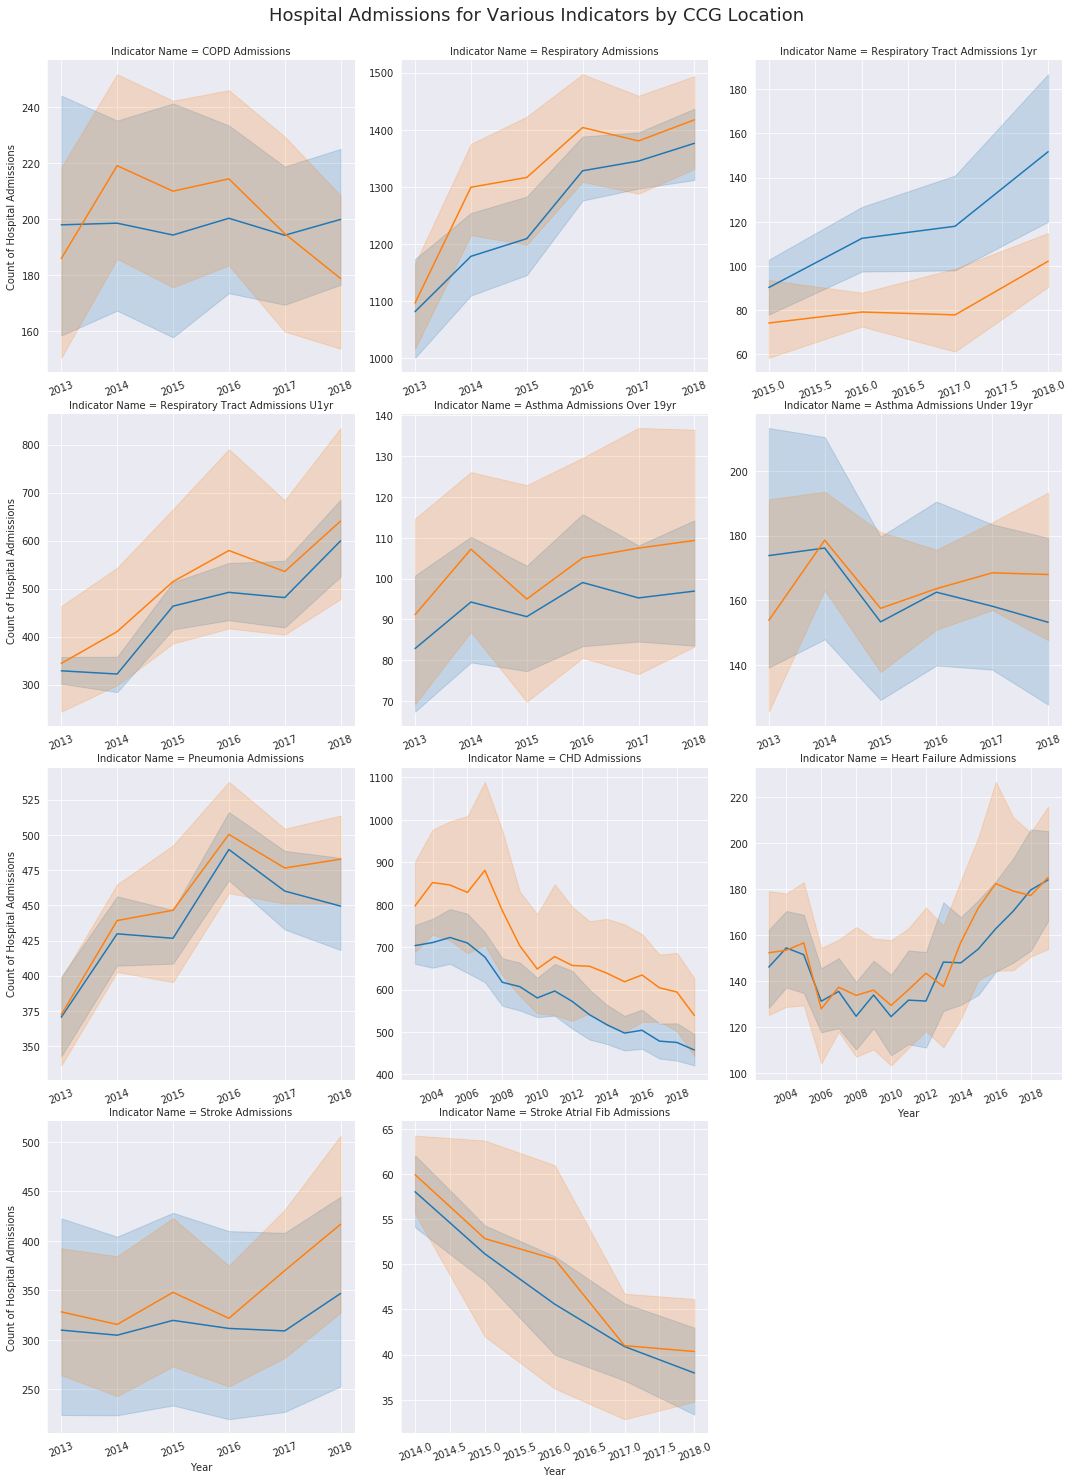

In [200]:
## Create facet grid, specify column order and map boxplots.
s = sns.FacetGrid(
    data=admissions_df, 
    col='Indicator Name', 
    col_wrap=3, 
    height=5,
    sharex=False,
    sharey=False,
    hue='CCG Location', 
)
s.map(sns.lineplot, 'Year', 'Value')

s.set_axis_labels(y_var='Count of Hospital Admissions')

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle('Hospital Admissions for Various Indicators by CCG Location', y = 1.02, size=18)

# rotate the x-ticks orientation for a facet grid
for ax in s.axes:
    for label in ax.get_xticklabels():
            label.set_rotation(20)

plt.show()

In [201]:
small = admissions_df[admissions_df['Indicator Name']== 'Stroke Atrial Fib Admissions']
small.Year.unique()

array([2014, 2015, 2016, 2017, 2018])

3.4 Finally - Look at the distribution of all admissions overtime with a histogram:

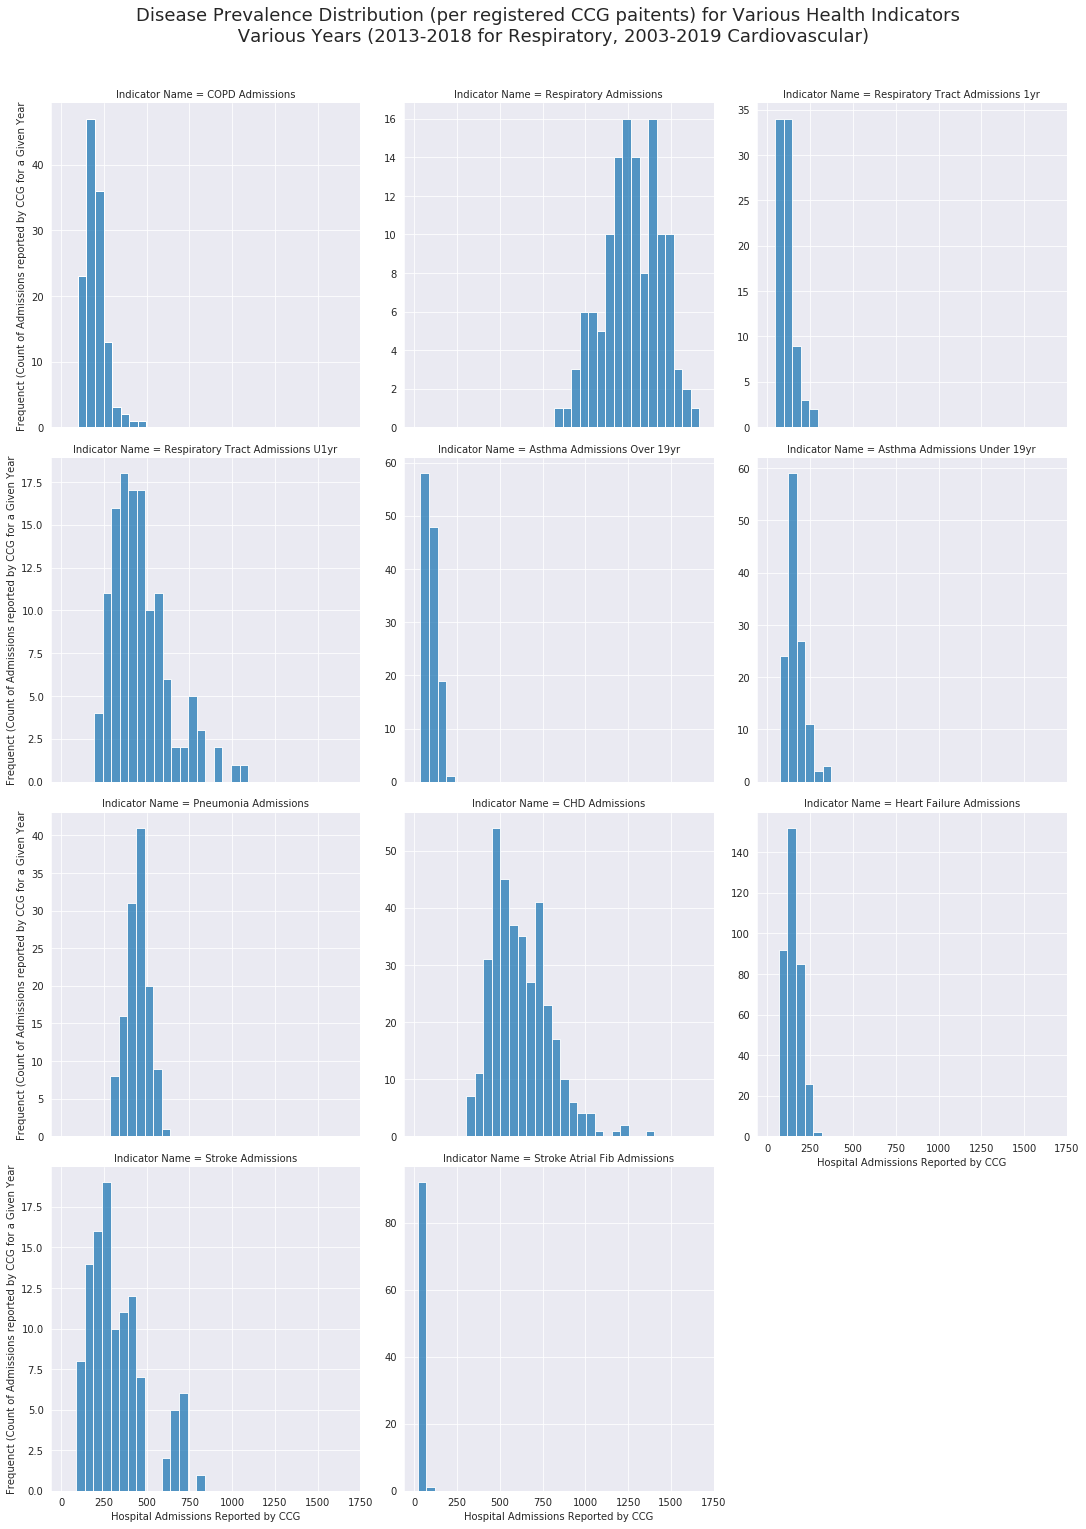

In [210]:
## Create facet grid, specify column order and map boxplots.
s = sns.FacetGrid(
    data=admissions_df, 
    col='Indicator Name', 
    col_wrap=3, 
    height=5,
    sharey=False,
#     hue='CCG Location', 
)
s.map_dataframe(sns.histplot, x='Value', binwidth=50)


s.set_axis_labels(x_var='Hospital Admissions Reported by CCG', y_var='Frequenct (Count of Admissions reported by CCG for a Given Year')

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle(
    'Disease Prevalence Distribution (per registered CCG paitents) for Various Health Indicators \n Various Years (2013-2018 for Respiratory, 2003-2019 Cardiovascular)', 
     y = 1.05, 
     size=18
)

plt.show()


Can we visualise the problem CCGs with a heatmap?

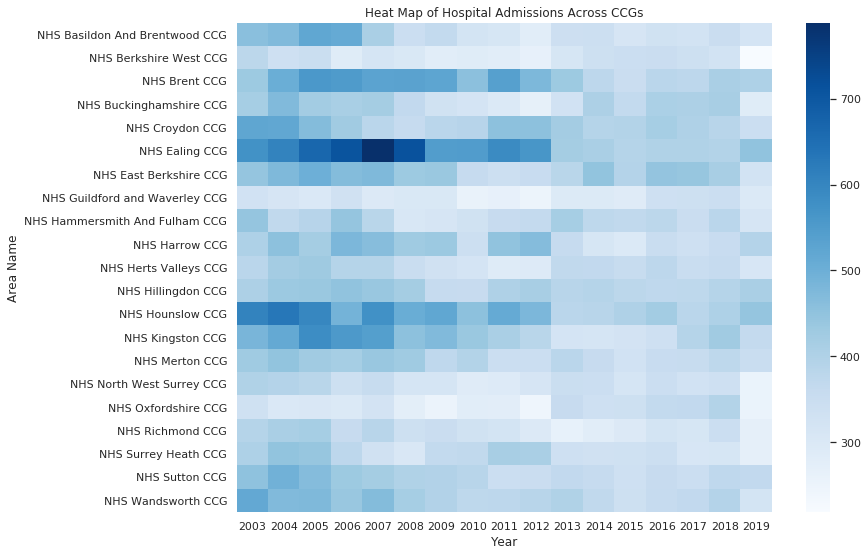

In [228]:
admissions_piv = admissions_df.pivot_table(
index='Area Name',
columns='Year',
values='Value'
) 

# specify plot size using sns.set() method, make it larger so we can spot the indicators trends clearly
sns.set(rc={'figure.figsize':(12,9)})

# set title 
plt.title('Heat Map of Hospital Admissions Across CCGs')

# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
sns.heatmap(admissions_piv, cmap='Blues')

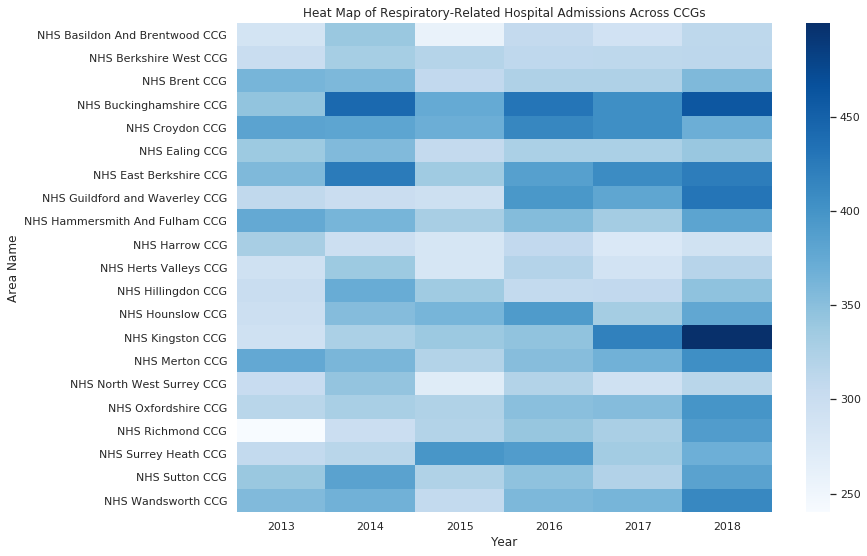

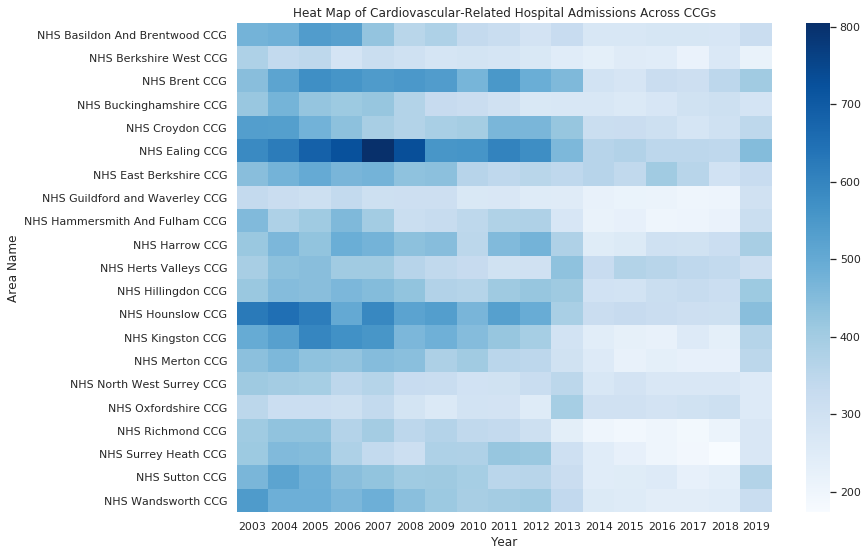

In [252]:
# Create heatmaps for Respiratory and Cardiovascular Hospital Admission


# resp_p 
# cardio_p


admissions_df_resp = admissions_df.copy()
admissions_df_resp = admissions_df_resp[admissions_df_resp['Indicator Name'].isin(respiratory)]
admissions_df_carv =  admissions_df.copy()
admissions_df_carv = admissions_df_carv[admissions_df_carv['Indicator Name'].isin(cardiov_)]

for ind_type, df in [['Respiratory-Related', admissions_df_resp], ['Cardiovascular-Related', admissions_df_carv]]:
    admissions_piv_tmp = df.pivot_table(
    index='Area Name',
    columns='Year',
    values='Value'
    ) 

    # specify plot size using sns.set() method, make it larger so we can spot the indicators trends clearly
    sns.set(rc={'figure.figsize':(12,9)})

    # set title 
    plt.title('Heat Map of {0} Hospital Admissions Across CCGs'.format(ind_type))

    # https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
    sns.heatmap(admissions_piv_tmp, cmap='Blues')
    
    # show the plot
    plt.show()
    

### 4. Plots for Disease Prevalence

4.1 - As there is no 'Sex' Breakdowns for the Prevalence data start with box plots Visualise the distribution of disease prevalence by Sex

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


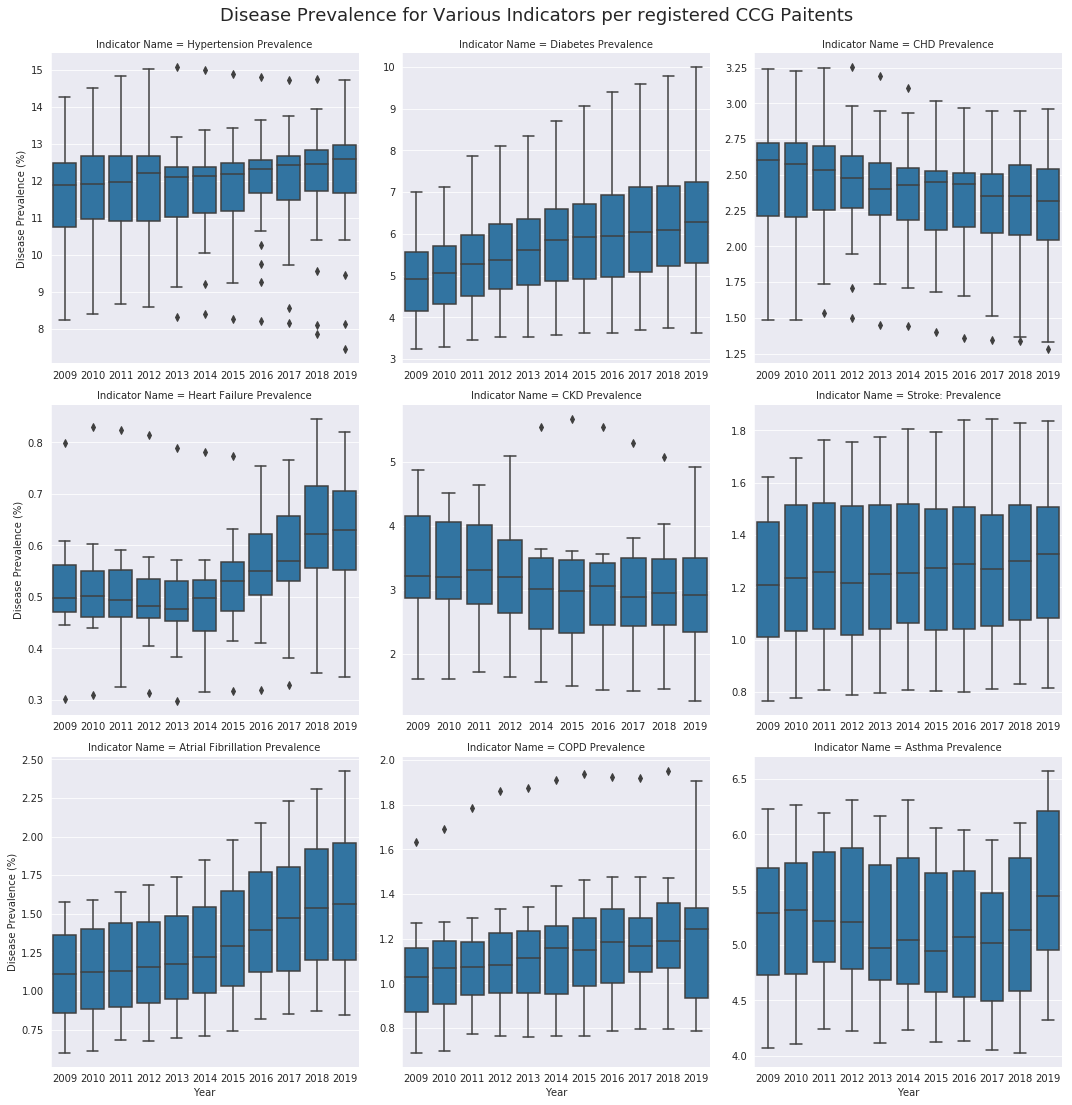

In [156]:
## Create facet grid, specify column order and map boxplots.
s = sns.FacetGrid(
    data=prevalence_df, 
    col='Indicator Name', 
    col_wrap=3, 
    height=5,
    sharex=False,
    sharey=False,
)
s.map(sns.boxplot, 'Year', 'Value')

s.set_axis_labels(y_var='Disease Prevalence (%)')

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle('Disease Prevalence for Various Indicators per registered CCG Paitents', y = 1.02, size=18)

plt.show()

Points of interest are Asthma (2019), Atrial Fibrillition (steady increase) and heart failure (2015)

4.2 Use a Boxplots Time Series to visualise the summary statistics of hospital admissions - breakdown by Radius (Inner/Outer)

4.2 Use a Boxplots Time Series to visualise the summary statistics of hospital admissions

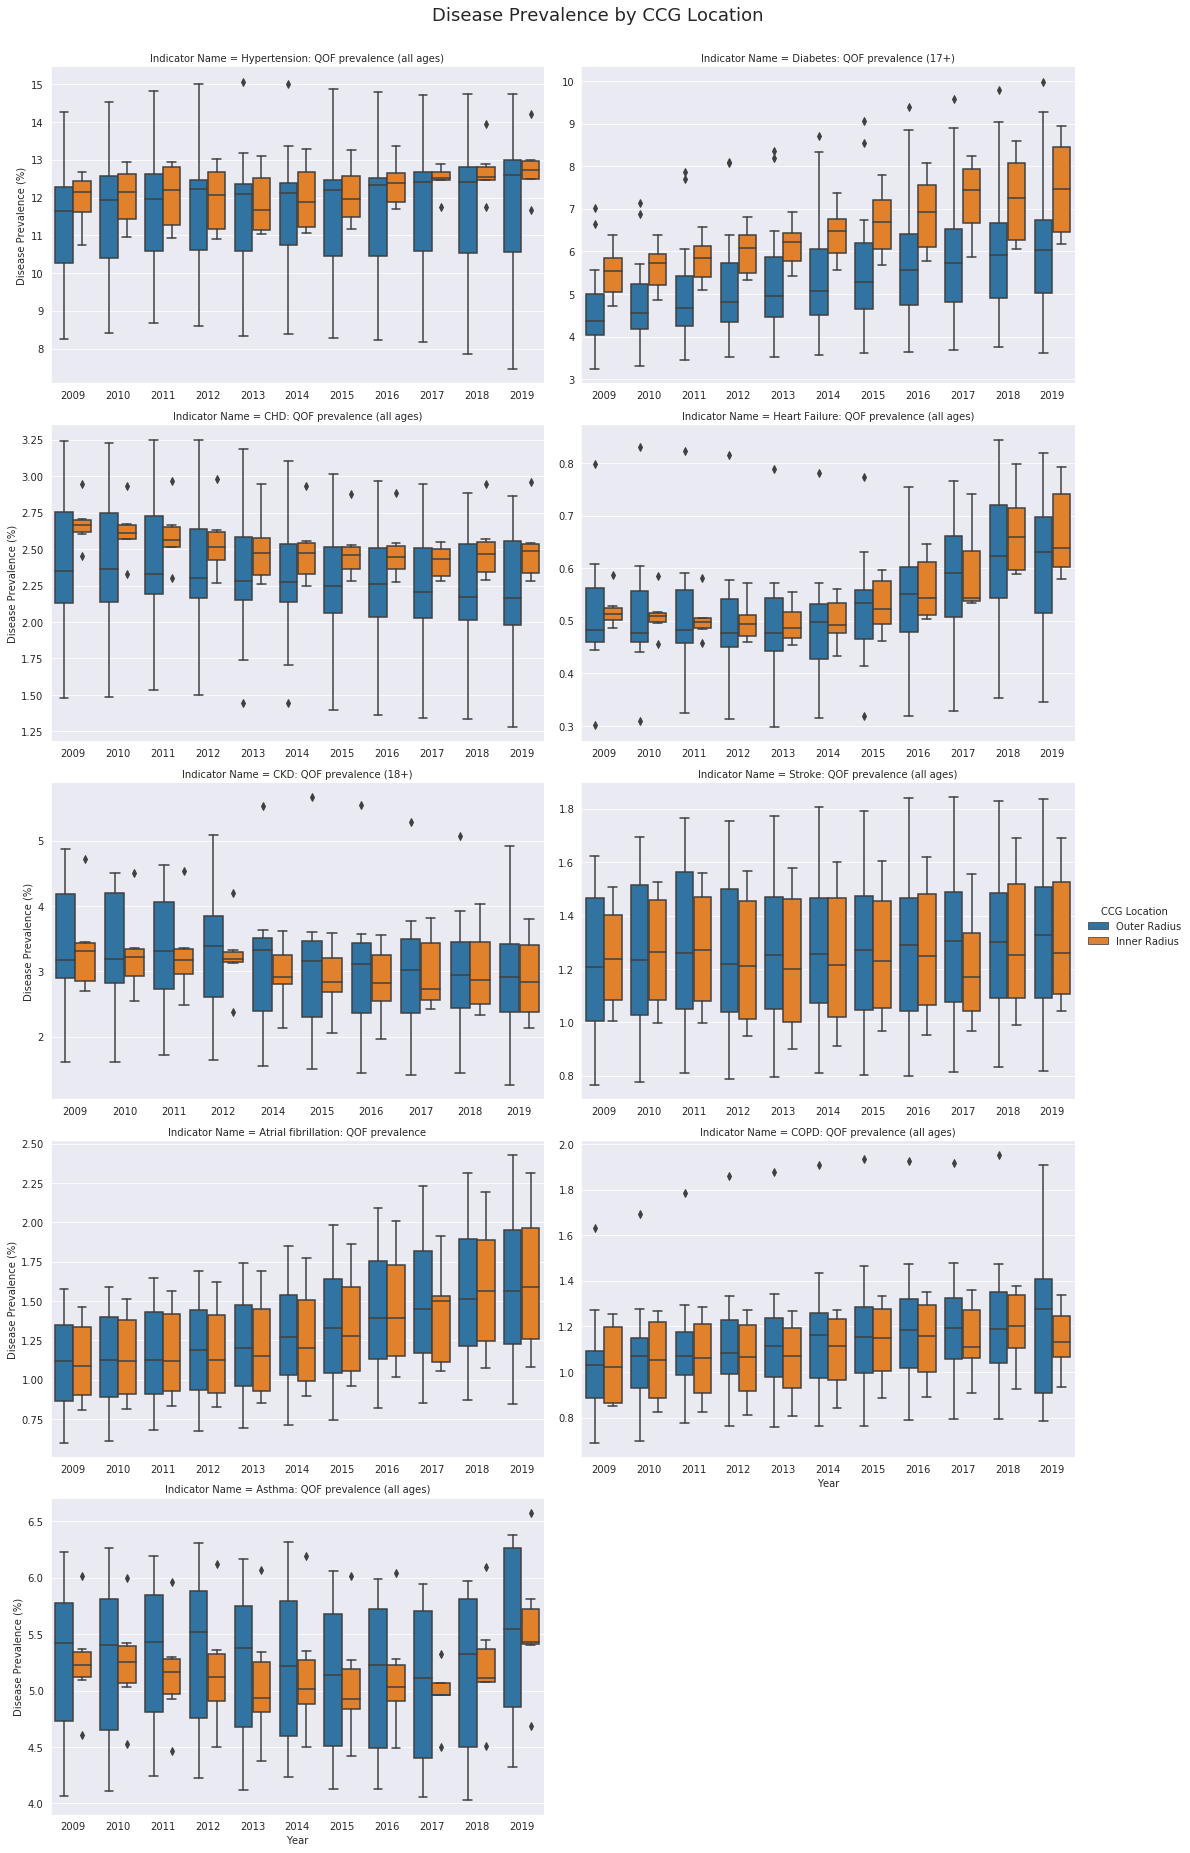

In [164]:
# Try boxplots by sex for both indicators... 

# as facet grid does not work with hue and boxplot, use catplot https://github.com/mwaskom/seaborn/issues/915
g = sns.catplot(
    x="Year", 
    y="Value", 
    col="Indicator Name", 
    kind="box", 
    data=prevalence_df, 
    hue='CCG Location', 
    col_wrap=2, 
    sharey=False, 
    sharex=False, 
    aspect=1.5,
   )
g.set_ylabels('Disease Prevalence (%)')

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle('Disease Prevalence by CCG Location', y = 1.02, size=18)

plt.show()

Points of interest: Diabetes is significantly more prevalent for the inner radius. Smaller data distributions notices across the inner radius (maybe as there are less CCGs). Asthma (2019) for the inner radius. 

4.3 Plot trends over time with lineplot series

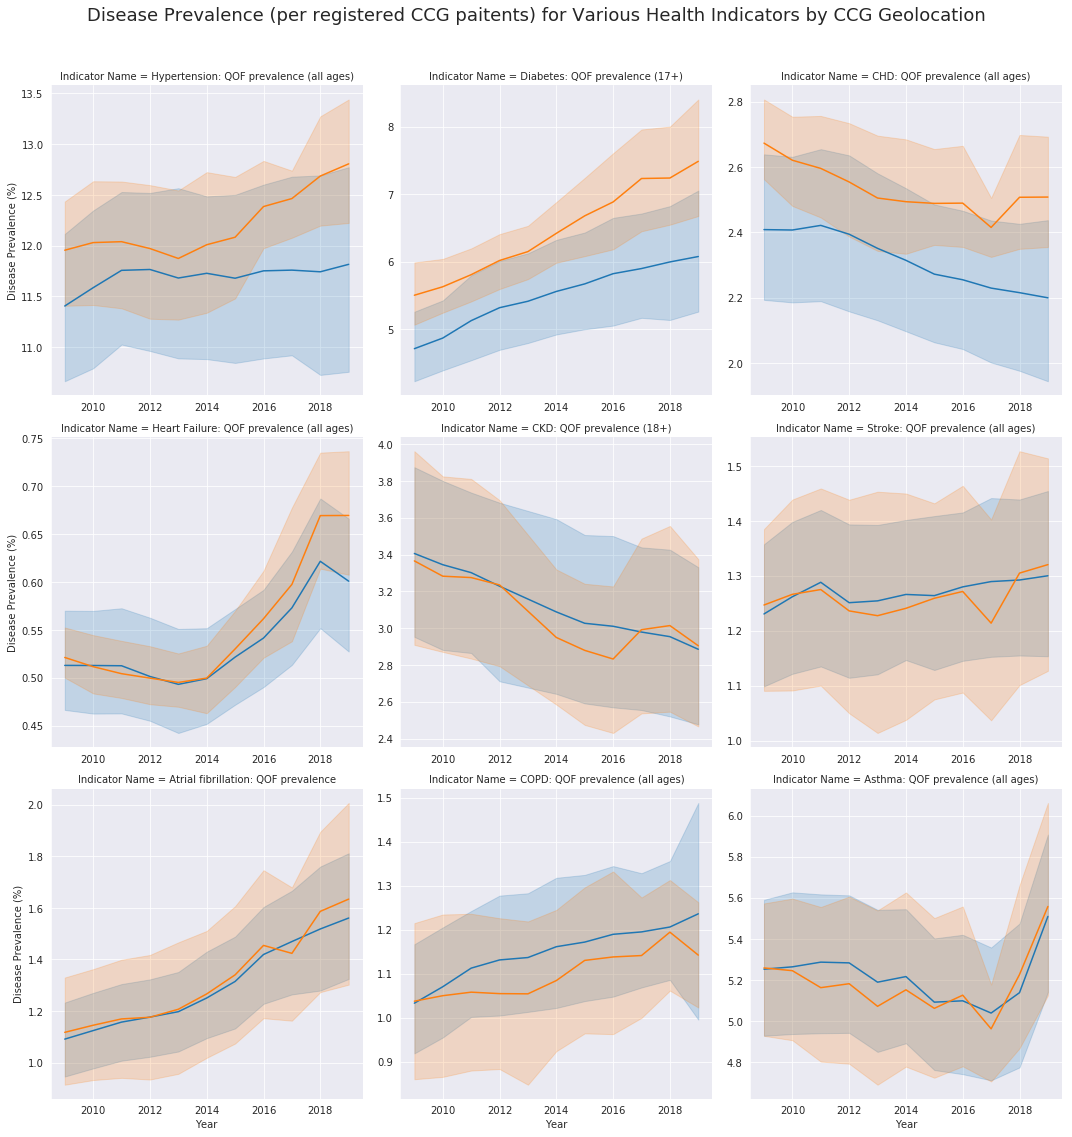

In [179]:
## Create facet grid, specify column order and map boxplots.
s = sns.FacetGrid(
    data=prevalence_df, 
    col='Indicator Name', 
    col_wrap=3, 
    height=5,
    sharex=False,
    sharey=False,
    hue='CCG Location', 
)
s.map(sns.lineplot, 'Year', 'Value')

s.set_axis_labels(y_var='Disease Prevalence (%)')

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle(
    'Disease Prevalence (per registered CCG paitents) for Various Health Indicators by CCG Geolocation', 
     y = 1.05, 
     size=18
)

plt.show()

Points of interest:
* (Asthma 2017 - 2019) Exponental increase and trend reversal. 
* Atrial Fibrillation
* Hyptertension (after 2013 inner region increases without outer region)
* Heart Failure (rise observed after 2014)
* Diabetes (steady increase across inner and outer regions)

4.4 Finally - Look at the distribution of all admissions overtime with a histogram:

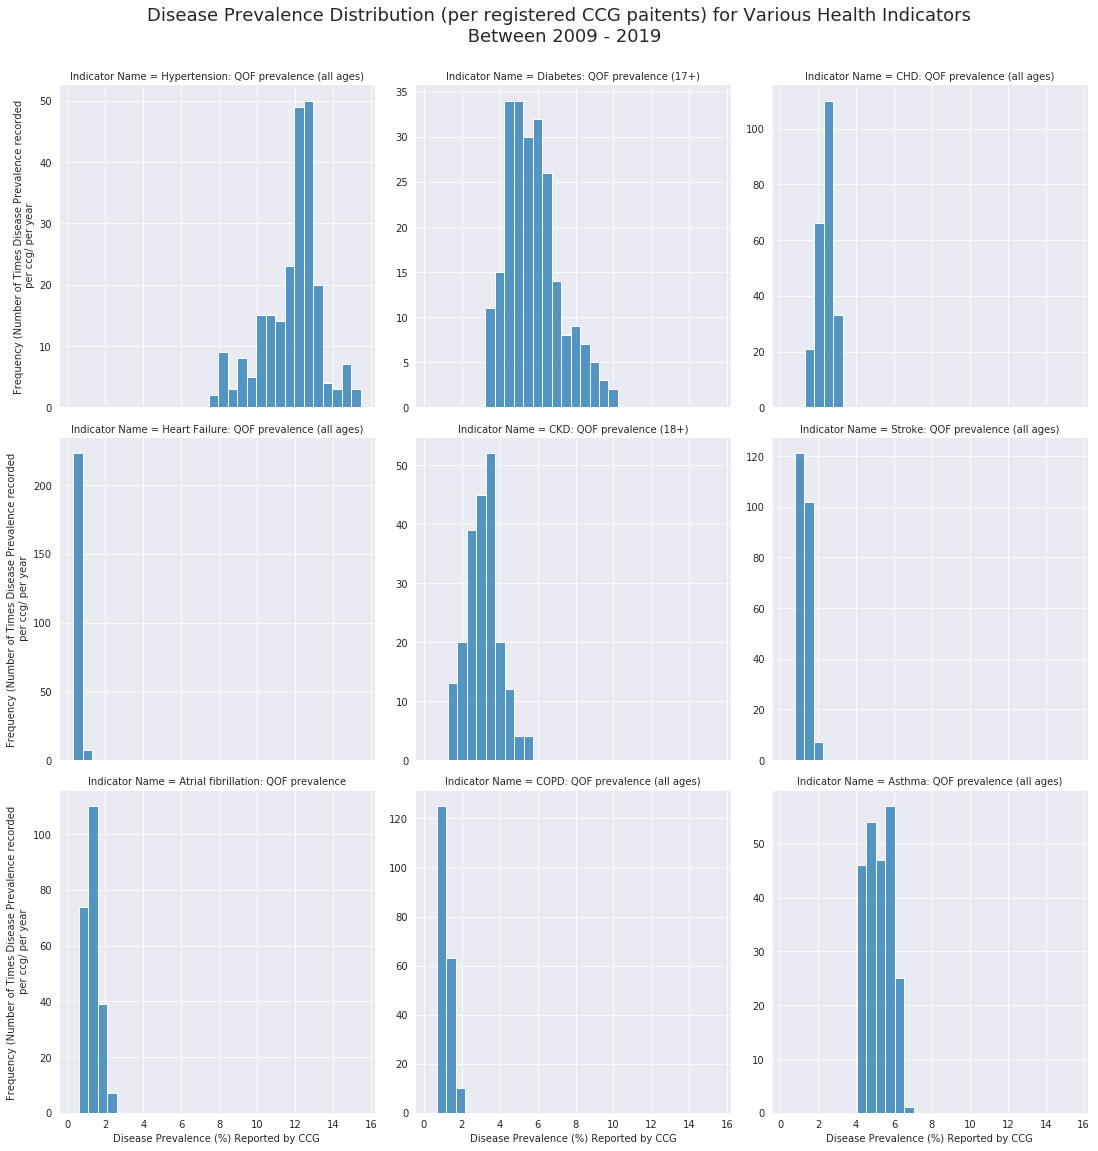

In [183]:
## Create facet grid, specify column order and map boxplots.
s = sns.FacetGrid(
    data=prevalence_df, 
    col='Indicator Name', 
    col_wrap=3, 
    height=5,
#     sharex=False,
    sharey=False,
#     hue='CCG Location', 
)
s.map_dataframe(sns.histplot, x='Value', binwidth=0.5)

# use plt.suptitle to give a title to the FacetGrid, specify position and size 
plt.suptitle(
    'Disease Prevalence Distribution (per registered CCG paitents) for Various Health Indicators \n Between 2009 - 2019', 
     y = 1.05, 
     size=18
)

s.set_axis_labels(
    x_var='Disease Prevalence (%) Reported by CCG', 
    y_var='Frequency (Number of Times Disease Prevalence recorded\n per ccg/ per year'
)

plt.show()

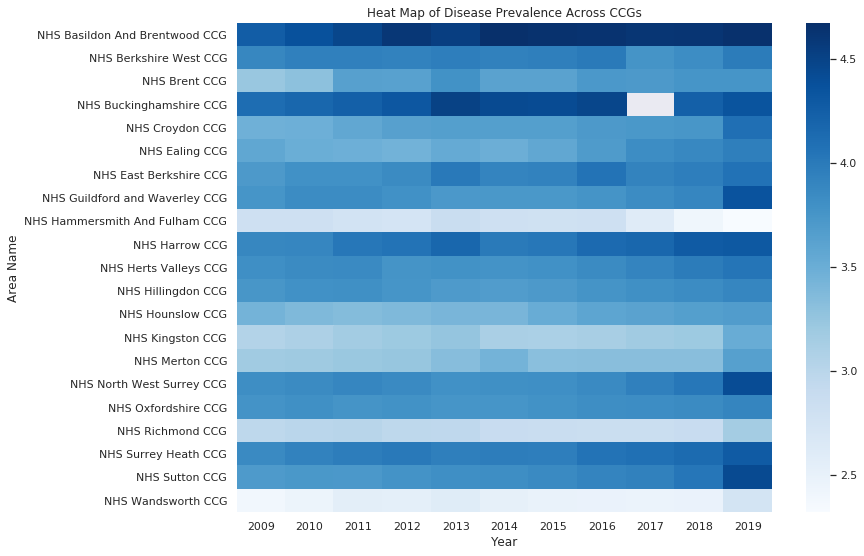

In [231]:
prevalence_piv = prevalence_df.pivot_table(
index='Area Name',
columns='Year',
values='Value'
) 

# specify plot size using sns.set() method, make it larger so we can spot the indicators trends clearly
sns.set(rc={'figure.figsize':(12,9)})

# set title and ylabel
plt.title('Heat Map of Disease Prevalence Across CCGs')

# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
sns.heatmap(prevalence_piv, cmap='Blues')

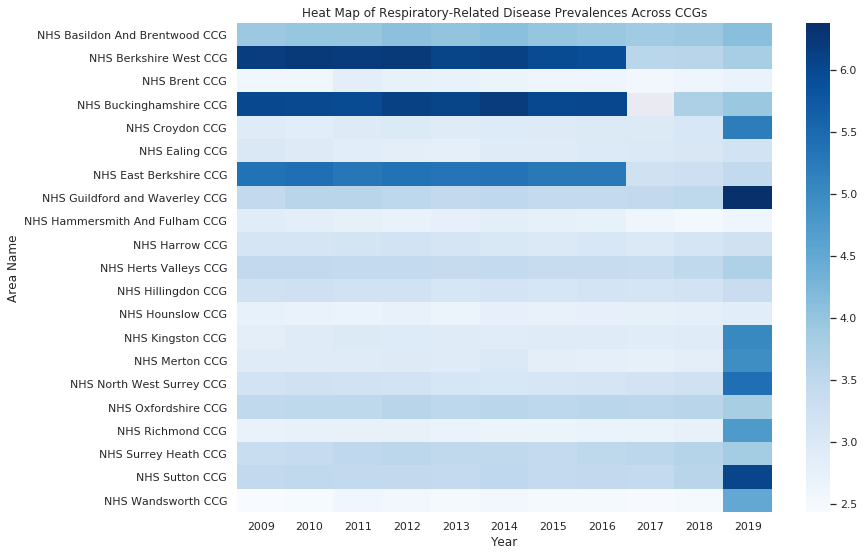

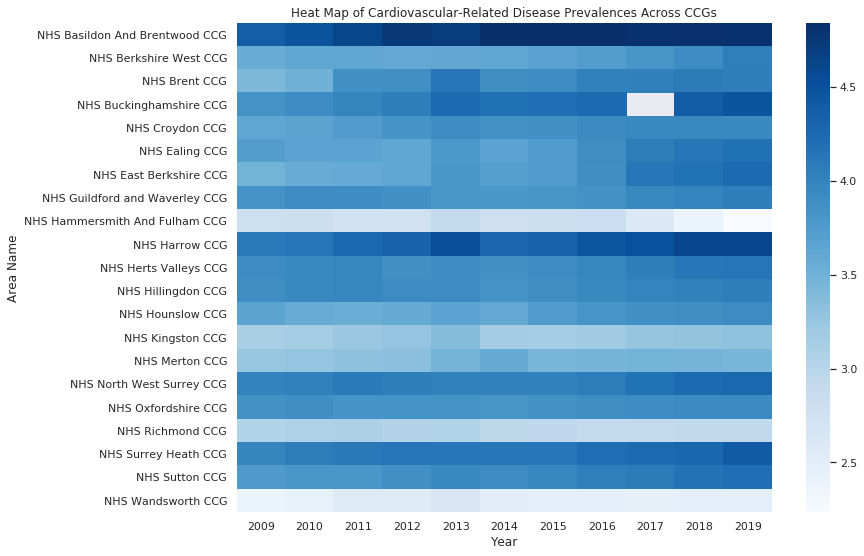

In [251]:
# Create heatmaps for Respiratory and Cardiovascular Hospital Admission


# resp_p 
# cardio_p


prevalence_df_resp = prevalence_df.copy()
prevalence_df_resp = prevalence_df_resp[prevalence_df_resp['Indicator Name'].isin(resp_p)]
prevalence_df_carv = prevalence_df.copy()
prevalence_df_carv = prevalence_df_carv[prevalence_df_carv['Indicator Name'].isin(cardio_p)]

for ind_type, df in [['Respiratory-Related', prevalence_df_resp], ['Cardiovascular-Related', prevalence_df_carv]]:
    prevalence_piv_tmp = df.pivot_table(
    index='Area Name',
    columns='Year',
    values='Value'
    ) 

    # specify plot size using sns.set() method, make it larger so we can spot the indicators trends clearly
    sns.set(rc={'figure.figsize':(12,9)})

    # set title 
    plt.title('Heat Map of {0} Disease Prevalences Across CCGs'.format(ind_type))
    # https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
    sns.heatmap(prevalence_piv_tmp, cmap='Blues')
    
    # show the plot
    plt.show()
    